# Bagpack Prediction Challenge

### Import Necessary Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Settigs

In [4]:
# Warning
warnings.filterwarnings("ignore")
# Plot
sns.set_style("dark")

### Import Data

In [80]:
# Import training data
train1_df = pd.read_csv("train.csv")
train_extra_df = pd.read_csv("training_extra.csv")
test_df = pd.read_csv("test.csv")

In [81]:
# Show 1st 5 rows of the train data
train1_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [74]:
# Show 1st 5 rows of the train extra data
train_extra_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


In [64]:
# Show 1st 5 rows of test data
test_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


### General Data Analysis

In [82]:
# Data Description
def describe_data(df):
    print(f"No. of observations:{df.shape[0]}")
    print(f"No. of features:{df.shape[1]}")

print("-" * 20 + "Training Data" + '-' * 20)
describe_data(train1_df)
print("-" * 20 + "Training extra Data" + '-' * 20)
describe_data(train_extra_df)
print("-" * 20 + "Test Data" + '-' * 20)
describe_data(test_df)

--------------------Training Data--------------------
No. of observations:300000
No. of features:11
--------------------Training extra Data--------------------
No. of observations:3694318
No. of features:11
--------------------Test Data--------------------
No. of observations:200000
No. of features:10


In [83]:
# Feature Description
print(train1_df.dtypes)
num_cols = [col for col in train1_df.columns if train1_df[col].dtype != "object"]
cat_cols = [col for col in train1_df.columns if train1_df[col].dtype == "object"]
print("-" * 60)
print(f"Number of Numeric Features: {len(num_cols)}")
print(num_cols)
print("-" * 60)
print(f"Number of Categorical Features: {len(cat_cols)}")
print(cat_cols)

id                        int64
Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object
------------------------------------------------------------
Number of Numeric Features: 4
['id', 'Compartments', 'Weight Capacity (kg)', 'Price']
------------------------------------------------------------
Number of Categorical Features: 7
['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']


In [84]:
# Missing Value Detection
def check_missing(df):
    if df.isnull().sum().sum() > 0:
        print(df.isnull().sum())
    else:
        print("No missing value present in data")
print("-" * 20 + "Training Data" + '-' * 20)
check_missing(train1_df)
print("-" * 20 + "Training Extra Data" + '-' * 20)
check_missing(train_extra_df)
print("-" * 20 + "Test Data" + '-' * 20)
check_missing(test_df)

--------------------Training Data--------------------
id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64
--------------------Training Extra Data--------------------
id                           0
Brand                   117053
Material                102615
Size                     81190
Compartments                 0
Laptop Compartment       91089
Waterproof               87274
Style                    96210
Color                   123667
Weight Capacity (kg)      1670
Price                        0
dtype: int64
--------------------Test Data--------------------
id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Lapto

In [85]:
# Duplicate row Detection
print("-" * 20 + "Training Data" + '-' * 20)
print(f"Number of duplicate rows: {train1_df.duplicated().sum()}")
print("-" * 20 + "Training Extra Data" + '-' * 20)
print(f"Number of duplicate rows: {train_extra_df.duplicated().sum()}")
print("-" * 20 + "Test Data" + '-' * 20)
print(f"Number of duplicate rows: {test_df.duplicated().sum()}")

--------------------Training Data--------------------
Number of duplicate rows: 0
--------------------Training Extra Data--------------------
Number of duplicate rows: 0
--------------------Test Data--------------------
Number of duplicate rows: 0


### Key Findings
- The training dataset has **300000** observations and training extra dataset has **3694318** observations.
- The test dataset has **200000** observations.
- It has **4** numeric features and **7** categorical features.
- As **id** feature contains unique value for each observation, this will not help the model find any pattern. So, this feature needs to b dropped.
- This training dataset has missing vales in many features in all **3 datasets(training, training extra and test)**. The missing vaues in categorical feqtures should be imputed with **Unknown** and missing values in numeric feature should be imputed with its **median** value.

### Data Cleaning

In [86]:
# Merge the training data and training extra data
train_df = pd.concat([train1_df, train_extra_df])

In [87]:
describe_data(train_df)

No. of observations:3994318
No. of features:11


In [88]:
# Drop id feature
train_df.drop('id', axis= 1, inplace= True)
check_missing(train_df)

Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64


In [92]:
# Fill the missing observations in Weight Capacity (kg) feature with its median value
train_df['Weight Capacity (kg)'].fillna(train_df['Weight Capacity (kg)'].median(), inplace= True)
test_df['Weight Capacity (kg)'].fillna(test_df['Weight Capacity (kg)'].median(), inplace= True)
# Sanity check
print("-" * 20 + "Training Data" + '-' * 20)
check_missing(train_df)
print("-" * 20 + "Test Data" + '-' * 20)
check_missing(test_df)

--------------------Training Data--------------------
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)         0
Price                        0
dtype: int64
--------------------Test Data--------------------
id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)       0
dtype: int64


In [93]:
# Fill the missing observations in Weight Capacity (kg) feature with its median value
train_df.fillna("Unknown", inplace= True)
test_df.fillna("Unknown", inplace= True)
# Sanity check
print("-" * 20 + "Training Data" + '-' * 20)
check_missing(train_df)
print("-" * 20 + "Test Data" + '-' * 20)
check_missing(test_df)

--------------------Training Data--------------------
No missing value present in data
--------------------Test Data--------------------
No missing value present in data


### Distribution Analysis of Numeric Features

Visualize the distribution of 'Compartments', 'Weight Capacity (kg)' and 'Price' using Histogram.

Text(0.5, 1.0, 'Distribution of Compartments')

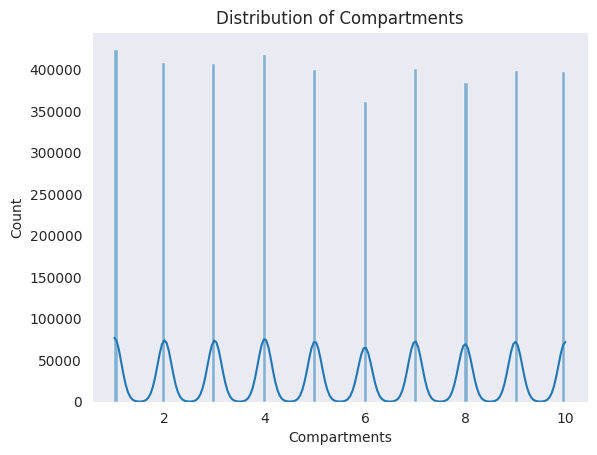

In [94]:
# Histogram of Compartments
sns.histplot(data= train_df, x= "Compartments", kde= True)
plt.title("Distribution of Compartments")

Text(0.5, 1.0, 'Distribution of Weight Capacity (kg)')

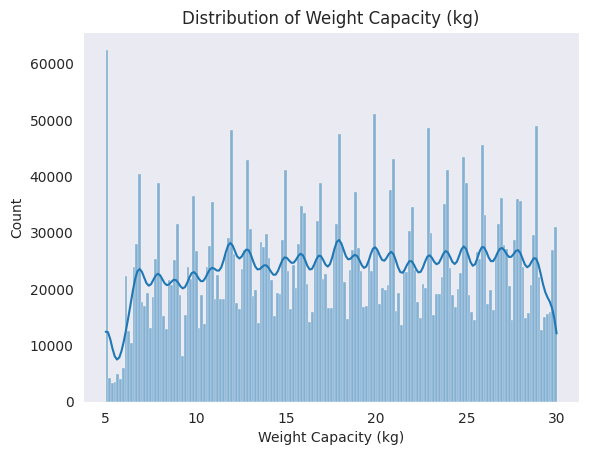

In [95]:
# Histogram of Weight Capacity (kg)
sns.histplot(data= train_df, x= "Weight Capacity (kg)", kde= True)
plt.title("Distribution of Weight Capacity (kg)")

### Target Analysis
Visualize distribution of Price and find Mean, Median, standard deviation

TARGET ANALYSIS
Mean: 81.36217459275402
Median: 80.98495
Standard Deviation: 38.93868410784115
Range: 15.0 - 150.0




Text(0.5, 1.0, 'Distribution of Price')

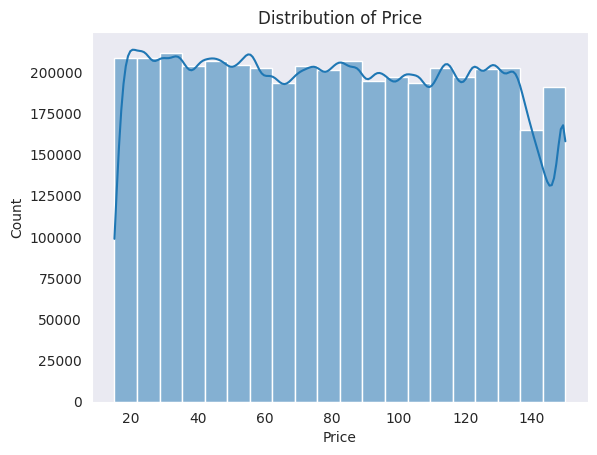

In [97]:
print("=" * 60)
print("TARGET ANALYSIS")
print("=" * 60)
print(f"Mean: {train_df['Price'].mean()}")
print(f"Median: {train_df['Price'].median()}")
print(f"Standard Deviation: {train_df['Price'].std()}")
print(f"Range: {train_df['Price'].min()} - {train_df['Price'].max()}\n\n")
# Visualize distribution
sns.histplot(data=train_df, x='Price', kde= True, bins= 20)
plt.title("Distribution of Price")

### Compartment Analysis
Analyze how number of compertments affects the price of a bagpack.

COMPARTMENT ANALYSIS
   Compartments   count
0           1.0  423577
1           4.0  417246
2           2.0  408150
3           3.0  406796
4           7.0  400824
5           5.0  399418
6           9.0  398192
7          10.0  396303
8           8.0  383172
9           6.0  360640
   Compartments      Price
0           1.0  81.032016
1           2.0  81.616355
2           3.0  81.166371
3           4.0  81.573869
4           5.0  81.474432
5           6.0  81.642001
6           7.0  81.601284
7           8.0  81.730636
8           9.0  80.280526
9          10.0  81.552311


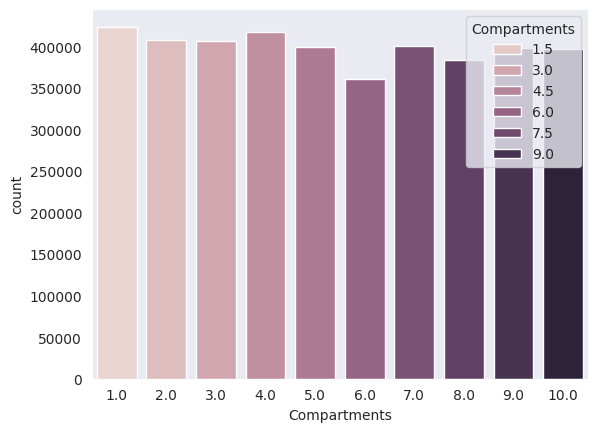

In [101]:
compartment_price = train_df.groupby("Compartments")["Price"].mean().reset_index()
compartment_count = train_df["Compartments"].value_counts().reset_index()
print("=" * 60)
print("COMPARTMENT ANALYSIS")
print("=" * 60)
print(compartment_count)
# Visualize count ot compartment
sns.barplot(data= compartment_count, x= "Compartments", y= "count", hue="Compartments")
print(compartment_price)
# Visualize Compartments Vs.Price
# sns.scatterplot(data= train_df, x= "Compartments", y= "Price", hue= "Compartments")
# plt.title("Relationship of Compartments with Price")

### Key Findings

- Average Price of bagpack of each number of compartments(1-10) are almost same. This indicates that price does not vary only according to the number of compartments. It depends of other factors also.

### Weight Capacity Analysis

Analyze how Weight Capacity (kg) affects the price of bagpack.

Text(0.5, 1.0, 'Relationship of Weight Capacity (kg) with Price')

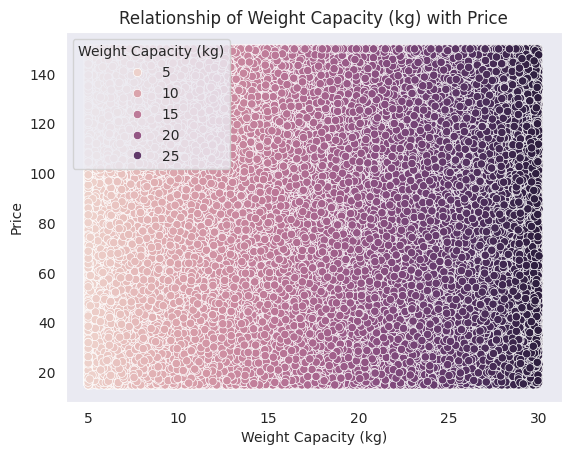

In [24]:
# Visualize Weight Capacity (kg) Vs.Price
sns.scatterplot(data= train_df, x= "Weight Capacity (kg)", y= "Price", hue= "Weight Capacity (kg)")
plt.title("Relationship of Weight Capacity (kg) with Price")

### Key Findings

- This visualization indicates that price does not vary only according to the number of Weight Capacity. It depends of other factors also.

### Brand Analysis

Analyze how brand affects the price of bagpack

BRAND ANALYSIS
          Brand      Price
0        Adidas  80.527683
1      Jansport  81.777549
2          Nike  81.284804
3          Puma  81.225577
4  Under Armour  82.065208
5       Unknown  80.991849
          Brand   count
0  Under Armour  801035
1        Adidas  797000
2          Nike  764407
3          Puma  755778
4      Jansport  749340
5       Unknown  126758


Text(0.5, 1.0, 'Average Price for Each Brand')

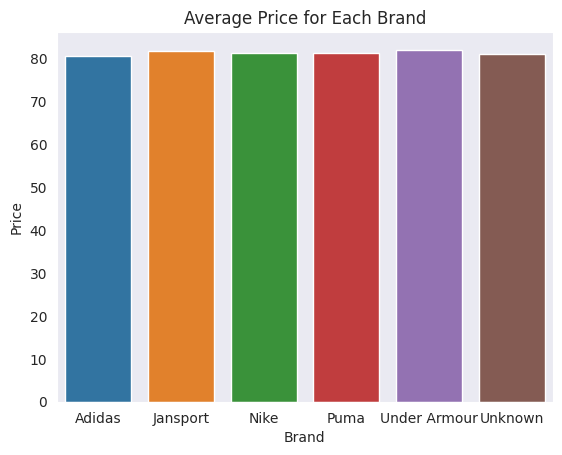

In [108]:
print("=" * 60)
print("BRAND ANALYSIS")
print("=" * 60)
brand_price = train_df.groupby("Brand")["Price"].mean().reset_index()
brand_count = train_df["Brand"].value_counts().reset_index()
print(brand_price)
print("=" * 60)
print(brand_count)
# Visualize Brand Vs. Price
sns.barplot(data= brand_price, x= "Brand", y="Price", hue= "Brand")
plt.title("Average Price for Each Brand")

### Key Findings

- Average Price of bagpack of each brand are almost same. This indicates that price does not vary only according to the brand. It depends of other factors also.

### Material Analysis

Analyze how Material affects the price of bagpack

MATERIAL ANALYSIS
    Material      Price
0     Canvas  81.831022
1    Leather  80.488749
2      Nylon  81.071794
3  Polyester  82.029424
4    Unknown  81.315460
    Material    count
0  Polyester  1060882
1    Leather   976186
2      Nylon   942656
3     Canvas   903632
4    Unknown   110962


Text(0.5, 1.0, 'Average Price for Each Material Type')

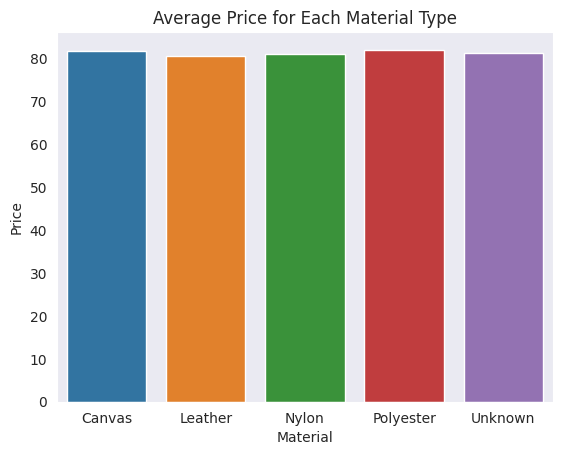

In [109]:
print("=" * 60)
print("MATERIAL ANALYSIS")
print("=" * 60)
material_price = train_df.groupby("Material")["Price"].mean().reset_index()
material_count = train_df["Material"].value_counts().reset_index()
print(material_price)
print("=" * 60)
print(material_count)
# Visualize Material Vs. Price
sns.barplot(data= material_price, x= "Material", y="Price", hue= "Material")
plt.title("Average Price for Each Material Type")

### Key Findings

- Average Price of bagpack of all material types are almost same. This indicates that price does not vary only according to the material. It depends of other factors also.

### Size Analysis

Analyze how Size affects the price of bagpack

SIZE ANALYSIS
      Size      Price
0    Large  81.611747
1   Medium  81.201377
2    Small  81.467620
3  Unknown  78.623194
      Size    count
0   Medium  1354487
1    Large  1312295
2    Small  1239751
3  Unknown    87785


Text(0.5, 1.0, 'Average Price for Each Size')

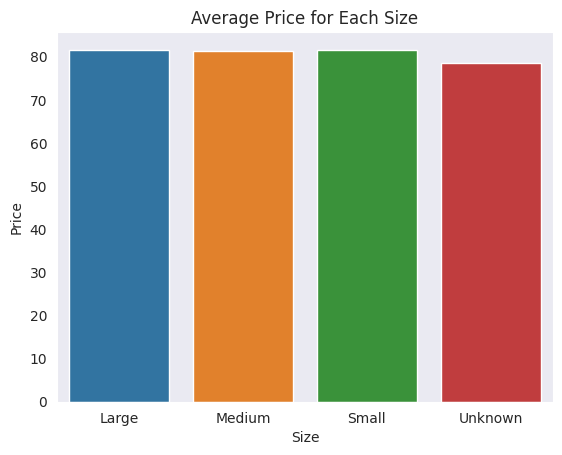

In [110]:
print("=" * 60)
print("SIZE ANALYSIS")
print("=" * 60)
size_price = train_df.groupby("Size")["Price"].mean().reset_index()
size_count = train_df["Size"].value_counts().reset_index()
print(size_price)
print("=" * 60)
print(size_count)
# Visualize Size Vs. Price
sns.barplot(data= size_price, x= "Size", y="Price", hue= "Size")
plt.title("Average Price for Each Size")

### Key Findings

- Average Price of bagpack of all sizes are almost same. This indicates that price does not vary only according to the size. It depends of other factors also.

### Laptop Compartment Analysis

Analyze how presence of laptop compartment affects the price of bagpack

LAPTOP COMPARTMENT ANALYSIS
  Laptop Compartment      Price
0                 No  81.350487
1            Unknown  80.428607
2                Yes  81.420190
  Laptop Compartment    count
0                Yes  1972937
1                 No  1922848
2            Unknown    98533


Text(0.5, 1.0, 'Average Price for Laptop Compartment')

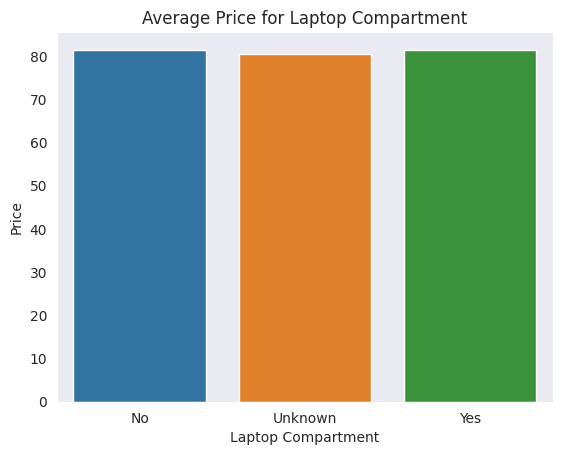

In [111]:
print("=" * 60)
print("LAPTOP COMPARTMENT ANALYSIS")
print("=" * 60)
laptop_compartment_price = train_df.groupby("Laptop Compartment")["Price"].mean().reset_index()
laptop_compartment_count = train_df["Laptop Compartment"].value_counts().reset_index()
print(laptop_compartment_price)
print("=" * 60)
print(laptop_compartment_count)
# Visualize Size Vs. Price
sns.barplot(data= laptop_compartment_price, x= "Laptop Compartment", y="Price", hue= "Laptop Compartment")
plt.title("Average Price for Laptop Compartment")

### Key Findings

- Average Price of bagpack are almost same whether laptop compartment is present or not. This indicates that price does not vary only according to the presence of laptop compartment. It depends of other factors also.

### Waterproof Analysis

Analyze how waterproof affects the price of bagpack

WATERPROOF ANALYSIS
  Waterproof      Price
0         No  81.438525
1    Unknown  78.771088
2        Yes  81.411426
  Waterproof    count
0        Yes  1969205
1         No  1930789
2    Unknown    94324


Text(0.5, 1.0, 'Average Price for Waterproof')

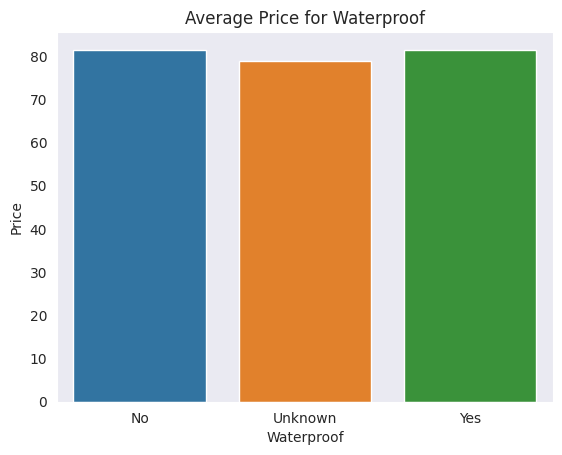

In [112]:
print("=" * 60)
print("WATERPROOF ANALYSIS")
print("=" * 60)
waterproof_price = train_df.groupby("Waterproof")["Price"].mean().reset_index()
waterproof_count = train_df["Waterproof"].value_counts().reset_index()
print(waterproof_price)
print("=" * 60)
print(waterproof_count)
# Visualize Waterproof Vs. Price
sns.barplot(data= waterproof_price, x= "Waterproof", y="Price", hue= "Waterproof")
plt.title("Average Price for Waterproof")

### Key Findings

- Average Price of bagpack are almost same whether it is waterproof or not. This indicates that price does not vary only according to the waterproof feature. It depends of other factors also.

### Style Analysis

Analyze how style affects the price of bagpack

STYLE ANALYSIS
       Style      Price
0   Backpack  81.357717
1  Messenger  81.185531
2       Tote  81.500007
3    Unknown  81.953537
       Style    count
0  Messenger  1329677
1       Tote  1297942
2   Backpack  1262519
3    Unknown   104180


Text(0.5, 1.0, 'Average Price for Style')

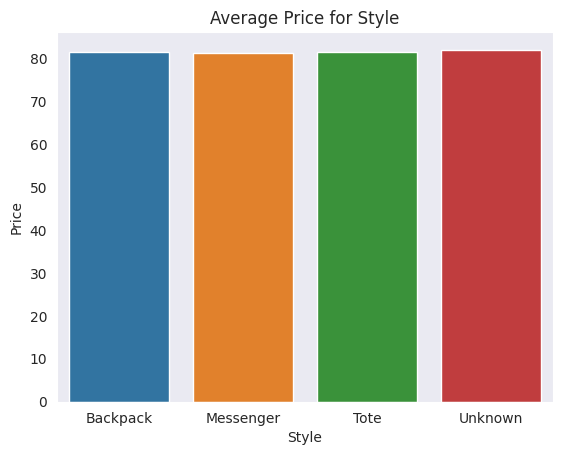

In [114]:
print("=" * 60)
print("STYLE ANALYSIS")
print("=" * 60)
style_price = train_df.groupby("Style")["Price"].mean().reset_index()
style_count = train_df["Style"].value_counts().reset_index()
print(style_price)
print("=" * 60)
print(style_count)
# Visualize Style Vs. Price
sns.barplot(data= style_price, x= "Style", y="Price", hue= "Style")
plt.title("Average Price for Style")

### Key Findings

- Average Price of bagpack are almost same all styles. This indicates that price does not vary only according to the style. It depends of other factors also.

### Color Analysis

Analyze how color affects the price of bagpack

COLOR ANALYSIS
     Color      Price
0    Black  80.326088
1     Blue  82.013390
2     Gray  80.917014
3    Green  82.252359
4     Pink  81.596170
5      Red  81.010017
6  Unknown  81.626821
     Color   count
0     Pink  688257
1     Gray  666110
2     Blue  638485
3      Red  630215
4    Black  620610
5    Green  617024
6  Unknown  133617


Text(0.5, 1.0, 'Average Price for Color')

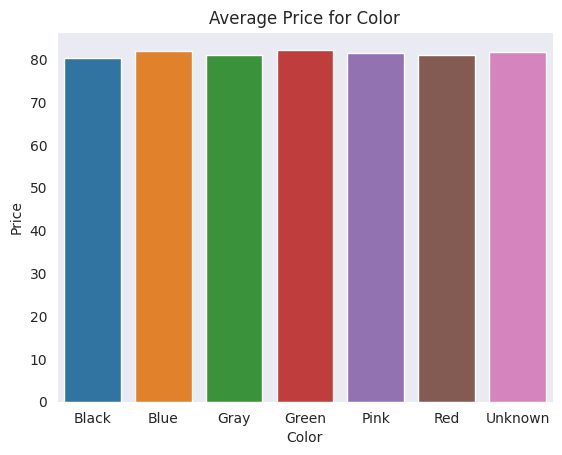

In [115]:
print("=" * 60)
print("COLOR ANALYSIS")
print("=" * 60)
color_price = train_df.groupby("Color")["Price"].mean().reset_index()
color_count = train_df["Color"].value_counts().reset_index()
print(color_price)
print("=" * 60)
print(color_count)
# Visualize Color Vs. Price
sns.barplot(data= color_price, x= "Color", y="Price", hue= "Color")
plt.title("Average Price for Color")

### Key Findings

- Average Price of bagpack are almost same all colors. This indicates that price does not vary only according to the color. It depends of other factors also.

### Feature Encoding

Encode the categorical features to numeric

In [116]:
# Encode the Size by mapping values
train_df["Size"] = train_df["Size"].map({"Large": 3, "Medium": 2, "Small": 1})

# Sanity check
train_df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,2.0,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,1.0,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,1.0,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,1.0,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,2.0,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [117]:
# Encode the Size by mapping values
test_df["Size"] = test_df["Size"].map({"Large": 3, "Medium": 2, "Small": 1})

# Sanity check
test_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,1.0,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,2.0,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,3.0,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,3.0,1.0,Yes,No,Messenger,Green,18.477036
4,300004,Unknown,Nylon,3.0,2.0,Yes,Yes,Tote,Black,9.907953


In [118]:
# Encode other categorical features using one hot encoding
train_df = pd.get_dummies(train_df, drop_first= True, dtype= int)
# Sanity check
train_df.head()

,Size,Compartments,Weight Capacity (kg),Price,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Brand_Unknown,Material_Leather,...,Waterproof_Yes,Style_Messenger,Style_Tote,Style_Unknown,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Color_Unknown
0,2.0,7.0,11.611723,112.15875,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1.0,10.0,27.078537,68.88056,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
2,1.0,2.0,16.643760,39.17320,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1.0,8.0,12.937220,80.60793,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2.0,1.0,17.749338,86.02312,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0


In [119]:
test_df = pd.get_dummies(test_df, drop_first= True, dtype= int)
# Sanity check
test_df.head()

,id,Size,Compartments,Weight Capacity (kg),Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Brand_Unknown,Material_Leather,...,Waterproof_Yes,Style_Messenger,Style_Tote,Style_Unknown,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Color_Unknown
0,300000,1.0,2.0,20.671147,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,300001,2.0,7.0,13.564105,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,300002,3.0,9.0,11.809799,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
3,300003,3.0,1.0,18.477036,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,300004,3.0,2.0,9.907953,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


### Prepare Data for Traning and Validation

In [120]:
# Separate input and target variable
X= train_df.drop("Price", axis= 1)
y= train_df["Price"]

In [57]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)

### Train and Evaluate Models

In [58]:
def train_evaluate(model):
    # Train the model
    model.fit(X_train_s, y_train)

    # Predict Train and validation with trained model
    y_train_pred = model.predict(X_train_s)
    y_val_pred = model.predict(X_val_s)

    # Print evaluation metrics
    print("-" * 20 + "Training Performance" + "-" *20)
    print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
    print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")
    print(f"R2: {r2_score(y_train, y_train_pred)}\n")
    print("-" * 20 + "Validation Performance" + "-" *20)
    print(f"MSE: {mean_squared_error(y_val, y_val_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred))}")
    print(f"MAE: {mean_absolute_error(y_val, y_val_pred)}")
    print(f"R2: {r2_score(y_val, y_val_pred)}")

In [60]:
# Decision Tree
dtr = DecisionTreeRegressor()
train_evaluate(dtr)

--------------------Training Performance--------------------
MSE: 0.012893634659244075
RMSE: 0.11355014160820794
MAE: 0.0005106753552100858
R2: 0.9999915033978014

--------------------Validation Performance--------------------
MSE: 3105.024714608591
RMSE: 55.7227486275452
MAE: 45.39601368833353
R2: -1.0541950265946047


### Performance Analysis

The above evaluation metrics for training and validation indicated that,
- **High R2 score and low error** for training data indicates that the model has memorized the data rather than generalize it.
- **Low R2 score and high error** for validation data indicates that the model is **Overfitted**.

We should try ensemble techniques to overcome this situation.

In [47]:
rfr = RandomForestRegressor(random_state= 42)
train_evaluate(rfr)

--------------------Training Performance--------------------
MSE: 225.40969729084372
RMSE: 15.01365036527905
MAE: 12.728912153418246
R2: 0.8514603073371427

--------------------Validation Performance--------------------
MSE: 1603.1294479376397
RMSE: 40.03909899008268
MAE: 34.26287277994328
R2: -0.060584324320257954


### Performance Analysis

The above evaluation metrics for training and validation indicated that,
- **High R2 score and low error** for training data indicates that the model has memorized the data rather than generalize it.
- **Low R2 score and high error** for validation data indicates that the model is **Overfitted**.


In [59]:
# XGBoost
xgbr = XGBRegressor()
train_evaluate(xgbr)

--------------------Training Performance--------------------
MSE: 1447.4349232017937
RMSE: 38.04516951206544
MAE: 32.846470465390034
R2: 0.04617440497927394

--------------------Validation Performance--------------------
MSE: 1525.2025030113398
RMSE: 39.05384107884063
MAE: 33.70178536968912
R2: -0.009030099340281872
